# <p style="background-color:#000000;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">DATA CLEANING & FEATURE ENGINEERING</p> 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
pd.set_option('display.max_columns', None) 


from datetime import date, datetime 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

Color Pallate


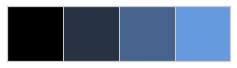

In [2]:
print("Color Pallate") #source :- https://encycolorpedia.com/6699dd

color = ["#000000" , "#273345" , "#46638d" , "#6699dd"]
palette = sns.color_palette(color)
sns.palplot(palette)

color tab for highlighting insights and markdowns --  

<p style="background-color:#273345 ; font-family:verdana ; color:white ; font-size:100% ; text-align:left ; border-radius:10px 10px ; letter-spacing:0.5px ; padding: 10px">        



</p> 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv" , sep = ";" )

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<p style="background-color:#273345 ; font-family:verdana ; color:white ; font-size:100% ; text-align:left ; border-radius:10px ; letter-spacing:0.5px ; padding: 10px">
only 1% of null values in income feature so we can drop it
</p>

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)

dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i) 
days = []
newest = max(dates) 
for i in dates:
    duration = newest - i
    days.append(duration)
df["Customer Loyalty"] = days
df["Customer Loyalty"] = df["Customer Loyalty"].dt.days


df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.drop(axis=1 , columns = ["MntWines" , "MntFruits" , "MntMeatProducts" , "MntFishProducts" , "MntSweetProducts" , "MntGoldProds"] , inplace = True)


df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df.drop(axis=1 , columns = ["NumWebPurchases" , "NumCatalogPurchases" , "NumStorePurchases" , "NumDealsPurchases"] , inplace = True)


df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df.drop(axis=1 , columns = ["AcceptedCmp1" , "AcceptedCmp2" , "AcceptedCmp3" , "AcceptedCmp4" , "AcceptedCmp5" , "Response"] , inplace = True)




df["Children"] = df["Kidhome"] +  df["Teenhome"]


df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})


df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [12]:
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer',"Marital_Status","Education"], axis=1, inplace=True)

 <p style="background-color:#273345;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">Lots of the data we have like Amount spents on different products, number of purchases etc. This data won't be available for new customers. So i will be training model using those columns only wich will be available for new customers so the model can predict the cluster.</p> 

In [13]:
df1 = df.copy()

In [14]:
num_col = df1.select_dtypes(include = np.number).columns

for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass

In [15]:
df1.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Age,Customer Loyalty,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Partner,Education_Level
0,58138.0,0,0,58,7,0,57,663,1617.0,25.0,1.0,0.0,No,Graduate
1,46344.0,1,1,38,5,0,60,113,27.0,6.0,0.0,2.0,No,Graduate
2,71613.0,0,0,26,4,0,49,312,776.0,21.0,0.0,0.0,Yes,Graduate
3,26646.0,1,0,26,6,0,30,139,53.0,8.0,0.0,1.0,Yes,Graduate
4,58293.0,1,0,94,5,0,33,161,422.0,19.0,0.0,1.0,Yes,Postgraduate


 <p style="background-color:#273345;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">removed outliiers</p> 

# <p style="background-color:#000000;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">FEATURE TRANSFORMATION</p> 

In [16]:
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


 <p style="background-color:#273345;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">Making the pipeline by using main features</p>

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [18]:
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [19]:
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

In [20]:
transformed = transformer.fit_transform(subset)

 <p style="background-color:#273345;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">data has now been transformed</p>

# <p style="background-color:#000000;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">CLUSTERING</p> 

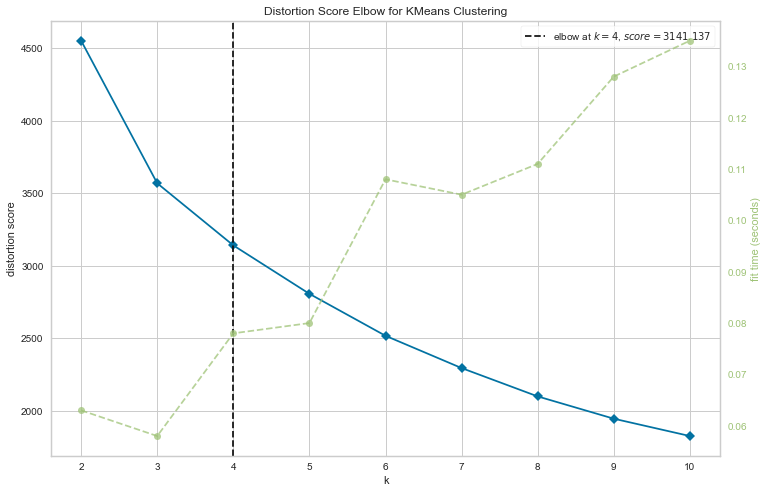

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

 <p style="background-color:#273345;font-family:verdana;color:white;font-size:100%;text-align:left;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">its now clear that k == 4</p>

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed)
df1["Cluster"] = kmeans.fit_predict(transformed)

C:\Users\adidr\AppData\Local\Temp\ipykernel_19200\1090457379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Clusters'] = kmeans.fit_predict(transformed)


In [23]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,1
1,46344.0,1,1,60,No,Graduate,1
2,71613.0,0,0,49,Yes,Graduate,3
3,26646.0,1,0,30,Yes,Graduate,0
4,58293.0,1,0,33,Yes,Postgraduate,3


In [30]:
df1.head()
catcol = ["Education_Level","Partner"]
le = LabelEncoder()
for col in catcol:
        df1[col] = le.fit_transform(df1[col])

In [32]:
df1.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Age,Customer Loyalty,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Partner,Education_Level,Cluster
0,58138.0,0,0,58,7,0,57,663,1617.0,25.0,1.0,0.0,0,0,1
1,46344.0,1,1,38,5,0,60,113,27.0,6.0,0.0,2.0,0,0,1
2,71613.0,0,0,26,4,0,49,312,776.0,21.0,0.0,0.0,1,0,3
3,26646.0,1,0,26,6,0,30,139,53.0,8.0,0.0,1.0,1,0,0
4,58293.0,1,0,94,5,0,33,161,422.0,19.0,0.0,1.0,1,1,3


In [33]:
curr_dir = os.getcwd()
csv_dir = "Transformed_files"
os.makedirs(os.path.join(curr_dir , csv_dir) , exist_ok = True)

In [34]:
subset.to_csv(os.path.join(os.path.join(curr_dir , csv_dir) , "clustered_subset.csv") , index=False)
df1.to_csv(os.path.join(os.path.join(curr_dir , csv_dir) , "clustred.csv") ,  index=False)

In [35]:
filename = "transformer.pkl"
pickle.dump(transformer, open(filename,'wb'))